# Problem Set 4 Solutions

## 18.330 Intro to Numerical Analysis (MIT, Spring 2019) 

Henrik Ronellenfitsch & Boya Song 

In [3]:
using PyPlot
using LinearAlgebra

### Problem 1. Constructing Finite Difference Stencils. (15 points)

####  (a)
$$\begin{align}
&f(x-h) = f(x) - h f'(x) + \frac{h^2}{2} f''(x) + O(h^3) &\implies f'(x) = \frac{f(x)-f(x-h)}{h} + \frac{h}{2} f''(x) + O(h^2) \\
&f(x-2h) = f(x) - 2h f'(x) + 2h^2 f''(x) + O(h^3) &\implies f'(x) = \frac{f(x)-f(x-2h)}{2h} + h f''(x) + O(h^2)
\end{align}$$

First equation $\times2 \, - \,$second equation, we have:

$$\begin{align}
f'(x) =2f'(x)-f'(x) &= \frac{4f(x)-4f(x-h)}{2h} -\frac{f(x)-f(x-2h)}{2h} +O(h^2)\\
&= \frac{3f(x)-4f(x-h) +f(x-2h) }{2h}  +O(h^2)
\end{align}$$

Therefore we have $w_{-2} = \frac{1}{2}$, $w_{-1} = -2$, $w_{0} = \frac{3}{2}$.

####  (b)
Here we denote $\frac{\partial}{\partial x}$ as $_x$, and $\frac{\partial}{\partial y}$ as $_y$ (e.g. $\frac{\partial^2 f}{\partial x \partial y}$ is $f_{yx}$). In this example it is safe to assume that $f_{yx} = f_{xy}$. (Second order partial derivatives commute if all the second partial derivatives of $f$ exist and are continuous.)
$$\begin{align}
&f(x, y+h) = f(x,y) + h f_y(x, y)  + \frac{h^2}{2}f_{yy}(x,y) + O(h^3)\\
&f(x+h, y) = f(x,y) + h f_x(x, y)  + \frac{h^2}{2}f_{xx}(x,y) + O(h^3)\\
&f(x+h, y+h) = f(x,y) + h f_x(x, y) + h f_y(x, y)  + \frac{h^2}{2}f_{yy}(x,y) + \frac{h^2}{2}f_{xx}(x,y) +h^2f_{yx}(x,y) + O(h^3) 
\end{align}$$
Therefore 
$$\begin{align}
f(x+h, y+h)+f(x,y) - f(x, y+h) -(x+h, y)  = h^2f_{yx}(x,y) + O(h^3) \\
h^2f_{yx}(x,y) = f(x+h, y+h)+f(x,y) - f(x, y+h) -(x+h, y)   + O(h^3)\\
f_{yx}(x,y)  = \frac{1}{h^2}\left[f(x+h, y+h)+f(x,y) - f(x, y+h) -(x+h, y)  \right] + O(h)
\end{align}$$.

Thus one possible answer is $w_{00} = \frac{1}{h^2}$, $w_{01} = -\frac{1}{h^2}$, $w_{10} = -\frac{1}{h^2}$ and $w_{11} = \frac{1}{h^2}$. This is a first-order scheme. 

### Problem 2. Convergence of Finite-Difference approximations. (25 points)

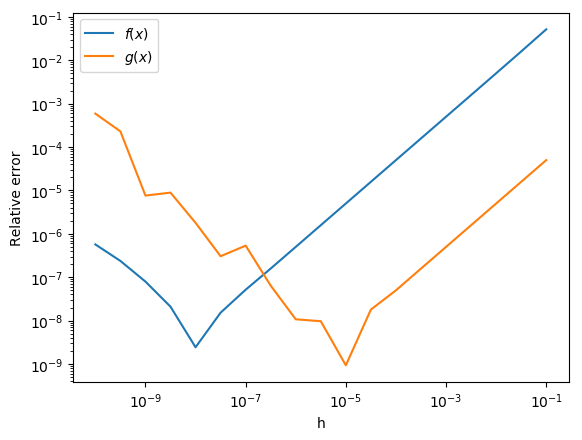

PyObject <matplotlib.legend.Legend object at 0x13649f4a8>

In [2]:
forward_difference_stencil(x, f, h) = (f(x+h)-f(x))/h;

f(x) = exp(x);
g(x) = x^2; 

f_exact = exp(1);
g_exact = 2000;

h_vec = 10.0 .^(-1:-0.5:-10);

f_rel_err = abs.([forward_difference_stencil(1, f, h) for h in h_vec] .- f_exact)./f_exact;
g_rel_err = abs.([forward_difference_stencil(1000, g, h) for h in h_vec] .- g_exact)./g_exact;


figure()
loglog(h_vec, f_rel_err, label=L"f(x)")
loglog(h_vec, g_rel_err, label=L"g(x)")
xlabel("h")
ylabel("Relative error")
legend()


There are two sources of error in this numerical scheme: the error from the forward finite-difference approximation and the rounding error. 

Using Taylor expansion around $f(x)$, we can derive that the error from our forward finite-difference approximation is $\frac{h}{2}f''(x)+O(h^2)$. Therefore the relative error from the finite-difference approximation is $$\varepsilon_{\text{FFD}} \approx \frac{h}{2}\left|\frac{f''(x)}{f'(x)}\right|.$$

The rounding error comes from the fact that when $h$ is very small, the difference between $f(x+h)$ and $f(x)$ is very small comparing to their values, therefore computing $f(x+h) - f(x)$ is not accurate any more. As the round off error of computing $\frac{f(x+h) - f(x)}{f(x)}$ is the machine epsilon $\varepsilon$, the relative round off error is:
$$\varepsilon_\text{roundoff} = \frac{\varepsilon}{ \frac{|f(x+h) - f(x)|}{|f(x)|}}.$$
By Taylor expansion around $f(x)$,   $\frac{|f(x+h) - f(x)|}{|f(x)|}\approx h\left| \frac{f'(x)}{f(x)}\right|$, therefore 
$$\varepsilon_\text{roundoff} \approx\varepsilon \left| \frac{f(x)}{f'(x)}\right| \frac{1}{h} \approx 10^{-16} \left| \frac{f(x)}{f'(x)}\right| \frac{1}{h}.$$

Therefore, the total error in this numerical scheme is 
$$\varepsilon_\text{total}(h) = \varepsilon_{\text{FFD}}(h) +  \varepsilon_\text{roundoff}(h) \approx  \frac{h}{2}\left|\frac{f''(x)}{f'(x)}\right| + 10^{-16}\left| \frac{f(x)}{f'(x)}\right| \frac{1}{h}.$$
From this expression we can see that when $h$ is large, the dominating error is $\varepsilon_{\text{FFD}}$, which increases with $h$ increasing; when $h$ is small, the dominating error is $\varepsilon_{\text{roundoff}}$, which decreases with $h$ decreasing. Thus there is an optimal value of $h$ that minimize the total error, which can obtained by solving $\frac{\partial \varepsilon_\text{total}}{\partial h} =0$:

$$h_\text{opt} = 10^{-8} \sqrt{\left|\frac{2f(x)}{f''(x)}\right|}.$$

1. $f(x)=e^x$ at $x=1$: We have $f(x)=f''(x)=e$, so $h_\text{opt} = 10^{-8} \times \sqrt{2e} \approx 10^{-8} $
2. $g(x)=x^2$ at $x=1000$: We have $g(x)=10^6$, $g''(x) =2$, so $h_\text{opt} = 10^{-8} \times \sqrt{10^6} = 10^{-5}$

These predictions agree excellently with the figure above. 

### Problem 3. Boundary value problems. (25 points)

#### (a) 
We can use the shooting methods, which converts the BVP into an IVP,
$$\frac{d^2 x}{dt^2} + \omega_0^2 x = \cos(t^2), \,\, x(0) = 0.3,\,\, x'(0) = x_{guess}$$
and the non-linear root-finding problem
$$x(10; x_{guess}) +2.9 = 0.$$

We can use our chosen ODE solver to solve the IVP during the process of root-finding. 

#### (b)

In [4]:
function second_derivative_matrix(N)
    return diagm(0 => -2ones(N),
                -1 => ones(N-1),
                 1 => ones(N-1))
end

# discretize interval
t0 = 0.0
t1 = 10.0

N = 512
h = (t1 - t0)/(N + 1)

0.01949317738791423

In [5]:
function solve_BVP(forcing)
    # natural frequency
    ω₀ = 4.3

    # boundary conditions
    Δ = zeros(N)
    Δ[1] = 0.3
    Δ[end] = -2.9

    # solve BVP
    A = second_derivative_matrix(N)
    ts = collect(t0 .+ h*(0:N+1))

    x_t_sol = (A/h^2 + ω₀^2*I) \ (forcing.(ts[2:end-1]) - Δ/h^2)

    # add in b.c.s
    x_t = zeros(N+2)
    x_t[1] = Δ[1]
    x_t[end] = Δ[end]
    x_t[2:end-1] = x_t_sol

    return ts, x_t
end

ts, x_t = solve_BVP(x -> cos(x^2))

([0.0, 0.0194932, 0.0389864, 0.0584795, 0.0779727, 0.0974659, 0.116959, 0.136452, 0.155945, 0.175439  …  9.82456, 9.84405, 9.86355, 9.88304, 9.90253, 9.92203, 9.94152, 9.96101, 9.98051, 10.0], [0.3, 0.628446, 0.952857, 1.27095, 1.5805, 1.87932, 2.16532, 2.43649, 2.69091, 2.92681  …  -3.78617, -3.78908, -3.76571, -3.71626, -3.64107, -3.54059, -3.41542, -3.2663, -3.09413, -2.9])

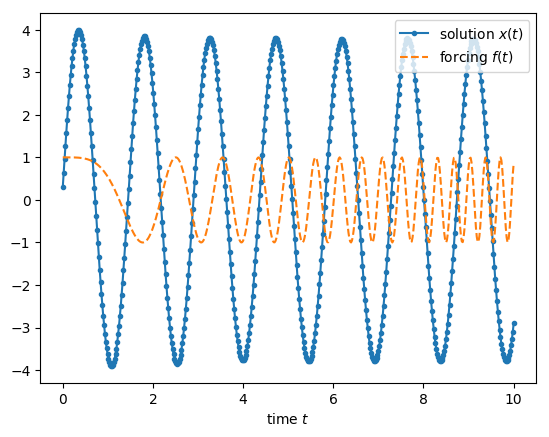

PyObject Text(0.5, 25.0, 'time $t$')

In [6]:
# Plot solution
figure()

plot(ts, x_t, ".-", label=L"solution $x(t)$")
plot(ts, cos.(ts.^2), "--", label=L"forcing $f(t)$")

legend()
xlabel(L"time $t$")

#### (c) 
We will observe resonance. 

In [7]:
# solve again with resonant forcing

ts, x_t = solve_BVP(x -> cos(4.3x))

([0.0, 0.0194932, 0.0389864, 0.0584795, 0.0779727, 0.0974659, 0.116959, 0.136452, 0.155945, 0.175439  …  9.82456, 9.84405, 9.86355, 9.88304, 9.90253, 9.92203, 9.94152, 9.96101, 9.98051, 10.0], [0.3, 0.512951, 0.722677, 0.9277, 1.12657, 1.31789, 1.5003, 1.67249, 1.83325, 1.98143  …  -3.69796, -3.71033, -3.69665, -3.65701, -3.59164, -3.50097, -3.38561, -3.24633, -3.08409, -2.9])

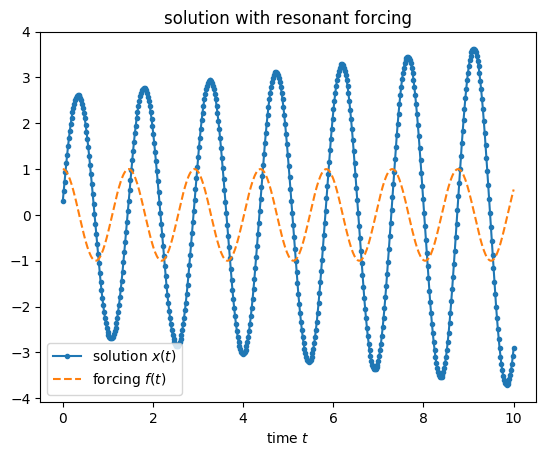

PyObject Text(0.5, 1.0, 'solution with resonant forcing')

In [8]:
# Plot solution
figure()

plot(ts, x_t, ".-", label=L"solution $x(t)$")
plot(ts, cos.(4.3ts), "--", label=L"forcing $f(t)$")

legend()
xlabel(L"time $t$")
title("solution with resonant forcing")

### Problem 4. Planar Electrostatics. (35 points)


#### (a)
The vector of function samples is $(f_{11}, f_{12}, \dots, f_{1N}, f_{21}, f_{22}, \dots f_{2N}, \dots f_{NN})$.
The forward differences in $x$ direction are
$$
f'_{FD,x} = h^{-1} (f(x+h,y) - f(x,y)),
$$

so

\begin{align}
h\, f'_{11} &=  f_{21} - f_{11} \\
h\, f'_{12} &=  f_{22} - f_{12} \\
\vdots \\
h\, f'_{21} &=  f_{31} - f_{21} \\
\vdots \\
h\, f'_{N1} &= \underbrace{f_{N+1,1}}_{=0} - f_{N1} \\
\vdots \\
h\, f'_{NN} &= \underbrace{f_{N+1,N}}_{=0} - f_{NN}.
\end{align}

Let's introduce contiguous indices for the 2D coordinates $(n,m)$:
$i(n,m) = m + N(n-1)$. So, $i(1,1) = 1 + 1\cdot 0 = 1$, $i(2,1) = 1 + N\cdot1 = N+1$, and so on.

The central differences in $x$ direction are

$$
2h\, (D_{CD,x})_{ij} = \begin{cases}
1, & j=i+N \\
-1, & j=i-N \text{ and } i > N\\
0, &\text{otherwise},
\end{cases}
$$

and for the second derivatives
$$
h^2\, (D_{CD,x})_{ij} = \begin{cases}
-2, & i=j \\
1, & j=i+N \\
1, & j=i-N \text{ and } i > N\\
0, &\text{otherwise},
\end{cases}
$$

The derivatives in the $y$ direction are analogous, but we must be careful
with the indices.
We obtain

$$
2h\, (D_{CD,x})_{ij} = \begin{cases}
1, & j=i+1 \text{and }\mod(i,N) \neq 0 \\
-1, & j=i-1 \text{and }\mod(i-1,N) \neq 0\\
0, &\text{otherwise},
\end{cases}
$$

and for the second derivatives
$$
h^2\, (D_{CD,x})_{ij} = \begin{cases}
-2, & i=j \\
1, & j=i+1 \text{and }\mod(i,N) \neq 0 \\
1, & j=i-1 \text{and }\mod(i-1,N) \neq 0\\
0, &\text{otherwise},
\end{cases}
$$

where $\operatorname{mod}(i,j)$ is the remainder when dividing $j/N$.

In [6]:
using PyPlot
PyPlot.svg(true)

function CD_x(N)
    """ Construct central difference matrix 
    for partial derivatives in x direction
    """
    M = zeros(N^2, N^2)
    
    for i=1:N^2        
        if i+N <= N^2
            M[i,i+N] = 1.0
        end
        
        if i > N
            M[i,i-N] = -1.0
        end
    end
    
    return M
end

function CD_y(N)
    """ Construct central difference matrix 
    for partial derivatives in y direction
    """
    M = zeros(N^2, N^2)
    
    for i=1:N^2
        if mod(i, N) != 0
            M[i,i+1] = 1.0
        end
        if mod(i-1, N) != 0
            M[i,i-1] = -1.0
        end
    end
    
    return M
end

function CD2_x(N)
    """ Construct central difference matrix 
    for partial derivatives in x direction
    """
    M = zeros(N^2, N^2)
    
    for i=1:N^2  
        M[i,i] = -2.0    
        
        if i+N <= N^2
            M[i,i+N] = 1.0
        end
        
        if i > N
            M[i,i-N] = 1.0
        end
    end
    
    return M
end


function CD2_y(N)
    """ Construct central difference matrix 
    for second partial derivatives in y direction
    """
    M = zeros(N^2, N^2)
    
    for i=1:N^2
        M[i,i] = -2.0
        
        if mod(i, N) != 0
            M[i,i+1] = 1.0
        end
        if mod(i-1, N) != 0
            M[i,i-1] = 1.0
        end
    end
    
    return M
end

CD2_y (generic function with 1 method)

#### (b)

In [7]:
N = 40
h = 1/(N+1)

# Construct Laplacian matrix
L = (CD2_x(N) + CD2_y(N))/h^2

1600×1600 Array{Float64,2}:
 -6724.0   1681.0      0.0      0.0  …      0.0      0.0      0.0      0.0
  1681.0  -6724.0   1681.0      0.0         0.0      0.0      0.0      0.0
     0.0   1681.0  -6724.0   1681.0         0.0      0.0      0.0      0.0
     0.0      0.0   1681.0  -6724.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0   1681.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0

In [8]:
# construct right hand side
function coords(N)
    """ Return x and y coordinate vector for N
    """
    h = 1.0/(N + 1.0)
    
    xs = zeros(N^2)
    ys = zeros(N^2)
    
    for i=1:N^2
        xs[i] = h*(i - mod(i-1, N))/N + h
        ys[i] = h*mod(i-1, N) + h
    end
    
    return xs, ys
end

xs, ys = coords(N)

ρ_1 = exp.(-50(xs .- 0.5).^2 .- 50(ys .- 0.5).^2);
ρ_2 = exp.(-100(xs .- 0.25).^2 .- 100(ys .- 0.25).^2) - exp.(-100(xs .- 0.75).^2 .- 100(ys .- 0.75).^2);

In [9]:
# Solve equations to obtain electrical potential
ϕ_1 = L \ ρ_1
ϕ_2 = L \ ρ_2;

In [10]:
# Compute electric field

D_x = CD_x(N)
D_y = CD_y(N)

# Compute x and y components of electric field
E_xs1 = -D_x*ϕ_1
E_ys1 = -D_y*ϕ_1

E_xs2 = -D_x*ϕ_2
E_ys2 = -D_y*ϕ_2;

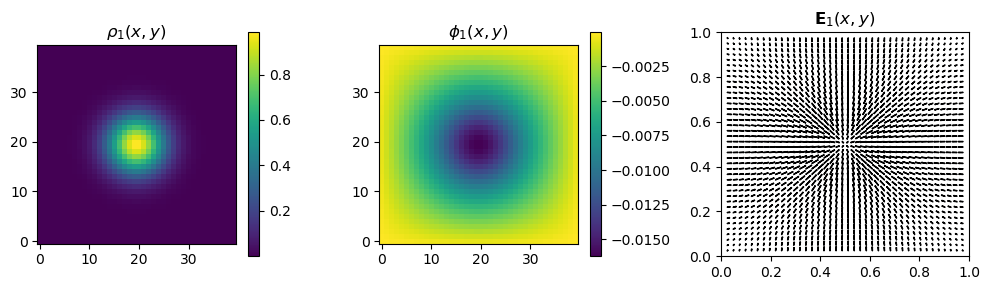

In [11]:
h, axs = subplots(1, 3, figsize=(10, 3))

# charge density
s = axs[1][:imshow](reshape(ρ_1, (N, N)), origin="lower")
h[:colorbar](s, ax=axs[1])
axs[1][:set_title](L"$\rho_1(x,y)$")

# potential
s = axs[2][:imshow](reshape(ϕ_1, (N, N)), origin="lower")
h[:colorbar](s, ax=axs[2])

axs[2][:set_title](L"$\phi_1(x,y)$")

# electric field
for (x, y, E_x, E_y) in zip(xs, ys, E_xs1, E_ys1)
    # scale by a factor
    axs[3][:arrow](x, y, 12E_x, 12E_y)
end

axs[3][:set_title](L"$\mathbf{E}_1(x,y)$")

h[:tight_layout]()

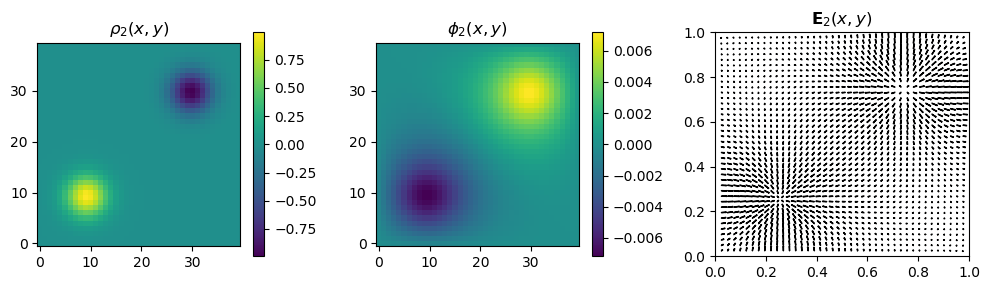

In [12]:
h, axs = subplots(1, 3, figsize=(10, 3))

# charge density
s = axs[1][:imshow](reshape(ρ_2, (N, N)), origin="lower")
h[:colorbar](s, ax=axs[1])
axs[1][:set_title](L"$\rho_2(x,y)$")

# potential
s = axs[2][:imshow](reshape(ϕ_2, (N, N)), origin="lower")
h[:colorbar](s, ax=axs[2])

axs[2][:set_title](L"$\phi_2(x,y)$")

# electric field
for (x, y, E_x, E_y) in zip(xs, ys, E_xs2, E_ys2)
    # scale by a factor
    axs[3][:arrow](x, y, 12E_x, 12E_y)
end

axs[3][:set_title](L"$\mathbf{E}_2(x,y)$")

h[:tight_layout]()